In [2]:
#IMPORTS
import os
import cv2
import numpy as np
import pandas as pd
from model_detector import Detector
from NMS import NMS
import torch
from PIL import Image
from IPython.display import display

In [4]:
#DETECTOR
detector = Detector()
detector.load('model60.pth')

In [9]:
#COMPARATOR
comparator = Comparator()
comparator.load_state_dict(torch.load('model_lfw (8).pth', map_location='cpu'))

<All keys matched successfully>

In [5]:
#you can test detector with show=True
path_test = 'C:\\Users\\Artem\\Desktop\\Artem\\NSU\\BMM_project\\data_for_trash\\4.jpg'
scale_percent = 60
out = detector.test(path_test, scale_percent=scale_percent, show=False)

C:\Users\Artem\anaconda3\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
#Non-maximum Supression
nms = NMS(0.3, 0.5)

In [7]:
#GET BOXES AFTER NMS
boxes = torch.cat((out['boxes'], out['scores'].view(-1,1)), axis=1).to(torch.float)
boxes = np.array(nms.nms(boxes))

In [8]:
#PLOT NEW BOXES
img = cv2.imread(path_test)
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
for box in boxes:
    cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (255,0,0), 1)
cv2.imshow('image', img)
cv2.waitKey(0)

-1

In [10]:
#CROP FACES
img = Image.open(path_test)
h, w = img.size
img = img.resize((int(h*scale_percent/100), int(w*scale_percent/100)))

faces = []
for box in boxes:
    faces.append(img.crop(box.astype(int)+[0,0,0,0]))
print(f'Number of cropped faces: {len(faces)}')

Number of cropped faces: 24


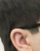

In [11]:
#CROPPED FACES
faces[10]

In [16]:
#FIND THE MOST SIMILAR FACES
path_your_face = 'C:\\Users\\Artem\\Desktop\\Artem\\NSU\\BMM_project\\yarik.jpg'
you = Image.open(path_your_face)

scores = []
for face in faces:
    scores.append(comparator.similarity(face, you))

Face number: 13, with score: 0.556


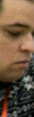

Face number: 12, with score: 0.722


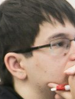

Face number: 6, with score: 0.757


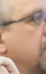

Face number: 18, with score: 0.848


Face number: 20, with score: 0.917


In [25]:
#TOP FACES
your_faces = []
for score in sorted(scores)[:5]:
    print(f'Face number: {scores.index(score)}, with score: {scores[scores.index(score)]:.3f}')
    your_faces.append(faces[scores.index(score)])
    display(faces[scores.index(score)])